## Hearing_test Logistic Regression

### Data

An experiment was conducted on 5000 participants to study the effects of age and physical health on hearing loss, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/no pass) which evaluated their ability to hear high frequencies. The age of the user was also noted. Is it possible to build a model that would predict someone's liklihood to hear the high frequency sound based solely on their features (age and physical score)?

* Features

    * age - Age of participant in years
    * physical_score - Score achieved during physical exam

* Label/Target

    * test_result - 0 if no pass, 1 if test passed

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv('hearing_test.csv')

In [49]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


### Exploratory Data Analysis and Visualization

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,51.60900,11.287001,18.0,43.0,51.0,60.0,90.0
physical_score,5000.0,32.76026,8.169802,-0.0,26.7,35.3,38.9,50.0
test_result,5000.0,0.60000,0.489947,0.0,0.0,1.0,1.0,1.0


In [52]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

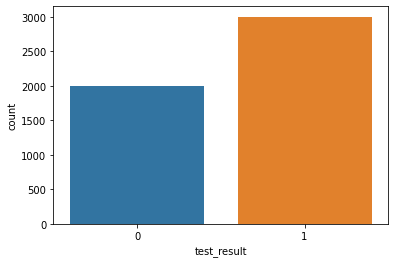

In [84]:
sns.countplot(df['test_result'])

<AxesSubplot:xlabel='test_result', ylabel='age'>

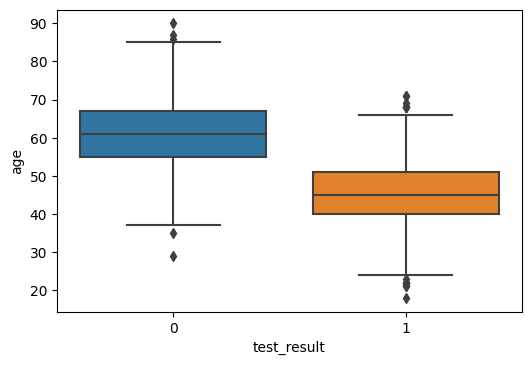

In [54]:
fig, ax = plt.subplots(dpi=100)
sns.boxplot(data=df, x='test_result', y='age')

From this graph we can see people who do not pass the test are older

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

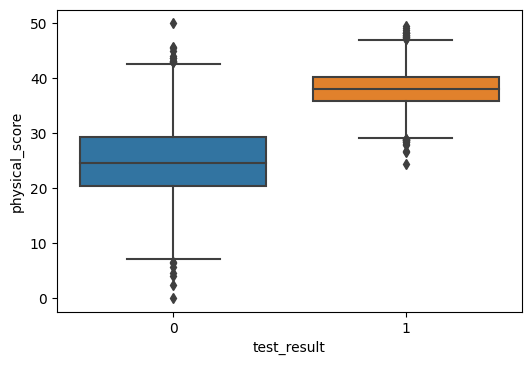

In [55]:
fig, ax = plt.subplots(dpi=100)
sns.boxplot(data=df, x='test_result', y='physical_score')

From this graph we can see if we have high physical score its extrmly likeli we pass the test

<AxesSubplot:xlabel='age', ylabel='physical_score'>

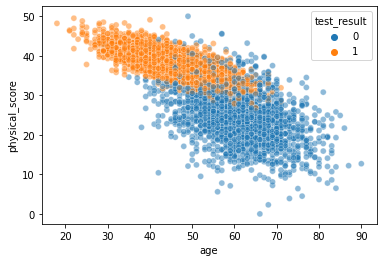

In [56]:
sns.scatterplot(data=df, x='age', y='physical_score', hue='test_result', alpha=0.5)

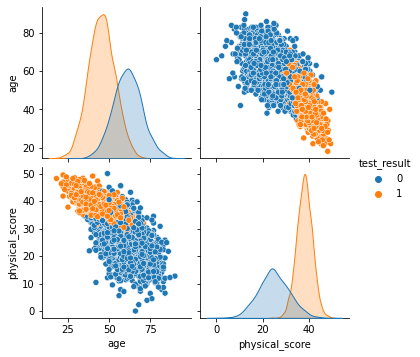

In [57]:
sns.pairplot(df, hue='test_result')

<AxesSubplot:>

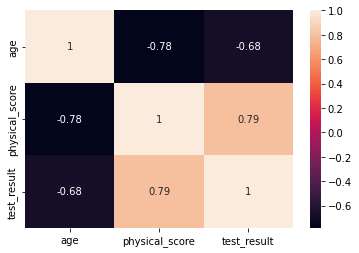

In [58]:
sns.heatmap(df.corr(), annot=True)

### Train | Test Split and Scaling

In [59]:
X = df.drop('test_result', axis = 1)
y = df['test_result']

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()

In [64]:
X_train =scaler.fit_transform(X_train)

In [65]:
X_test = scaler.transform(X_test)

### Logistic Regression Model

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
logistic_model = LogisticRegression()

In [68]:
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [69]:
logistic_model.coef_

array([[-0.96920669,  3.5691453 ]])

In [70]:
y_predicted = logistic_model.predict(X_test)

In [71]:
y_predicted

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

### Performance Matrix

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [73]:
accuracy = accuracy_score(y_test, y_predicted)
accuracy

0.9053333333333333

In [74]:
confusion_matrix(y_test, y_predicted)

array([[525,  84],
       [ 58, 833]], dtype=int64)

In [75]:
from sklearn.metrics import plot_confusion_matrix

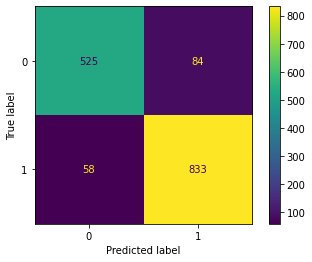

In [83]:
plot_confusion_matrix(estimator=logistic_model, X=X_test,y_true=y_test)
plt.show()

In [79]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       609
           1       0.91      0.93      0.92       891

    accuracy                           0.91      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.91      0.91      0.90      1500



In [85]:
from sklearn.metrics import precision_score, recall_score

In [86]:
precision_score(y_test, y_predicted)

0.9083969465648855

In [87]:
recall_score(y_test, y_predicted)

0.9349046015712682

In [88]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

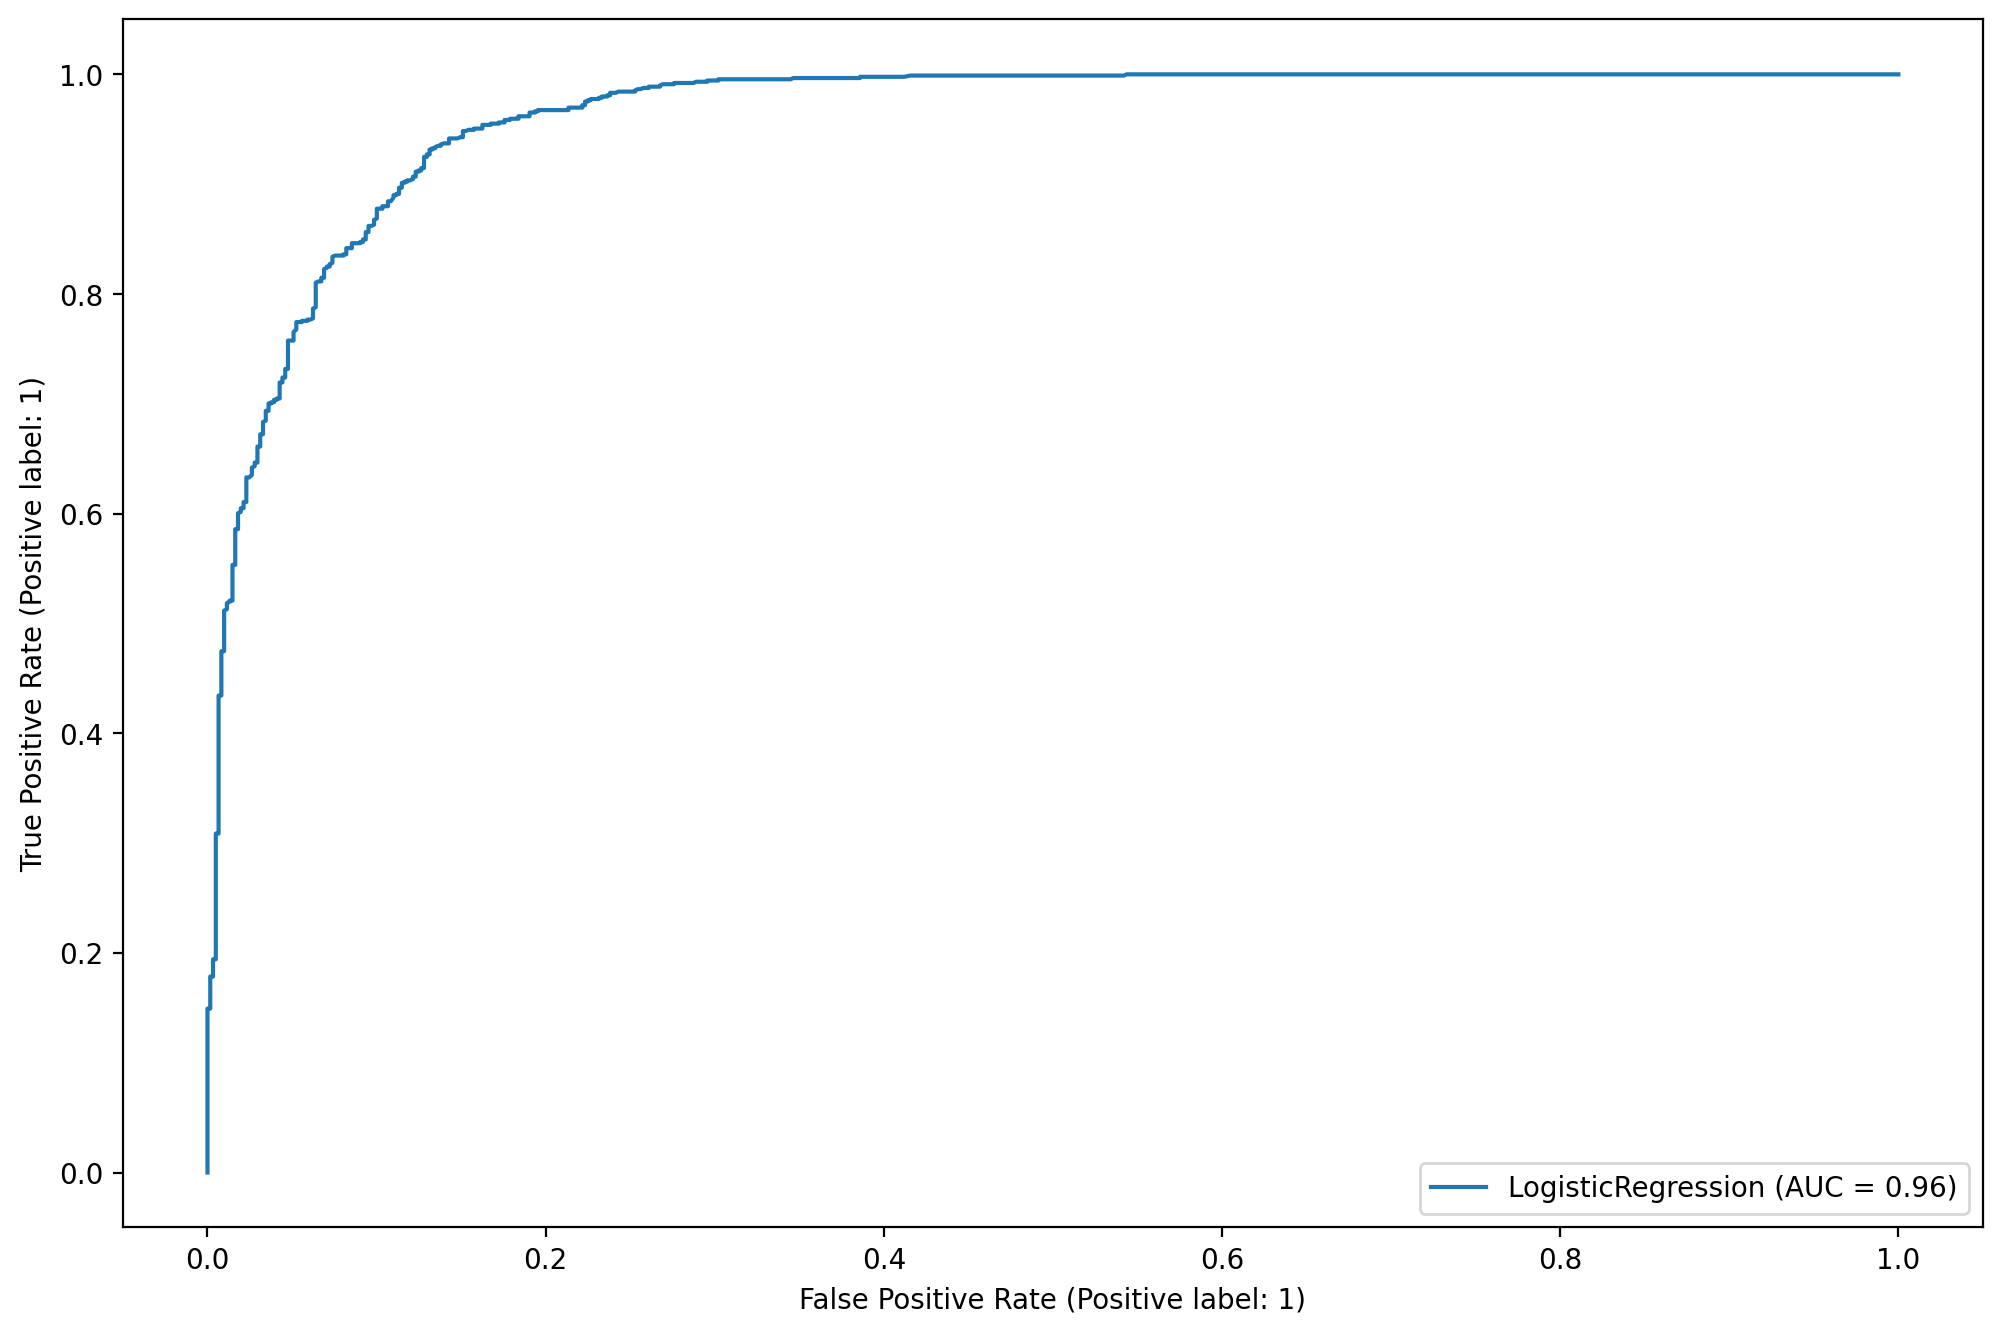

In [97]:
fig, ax= plt.subplots(figsize=(12,8),dpi=200)
plot_roc_curve(logistic_model, X_test, y_test, ax= ax)

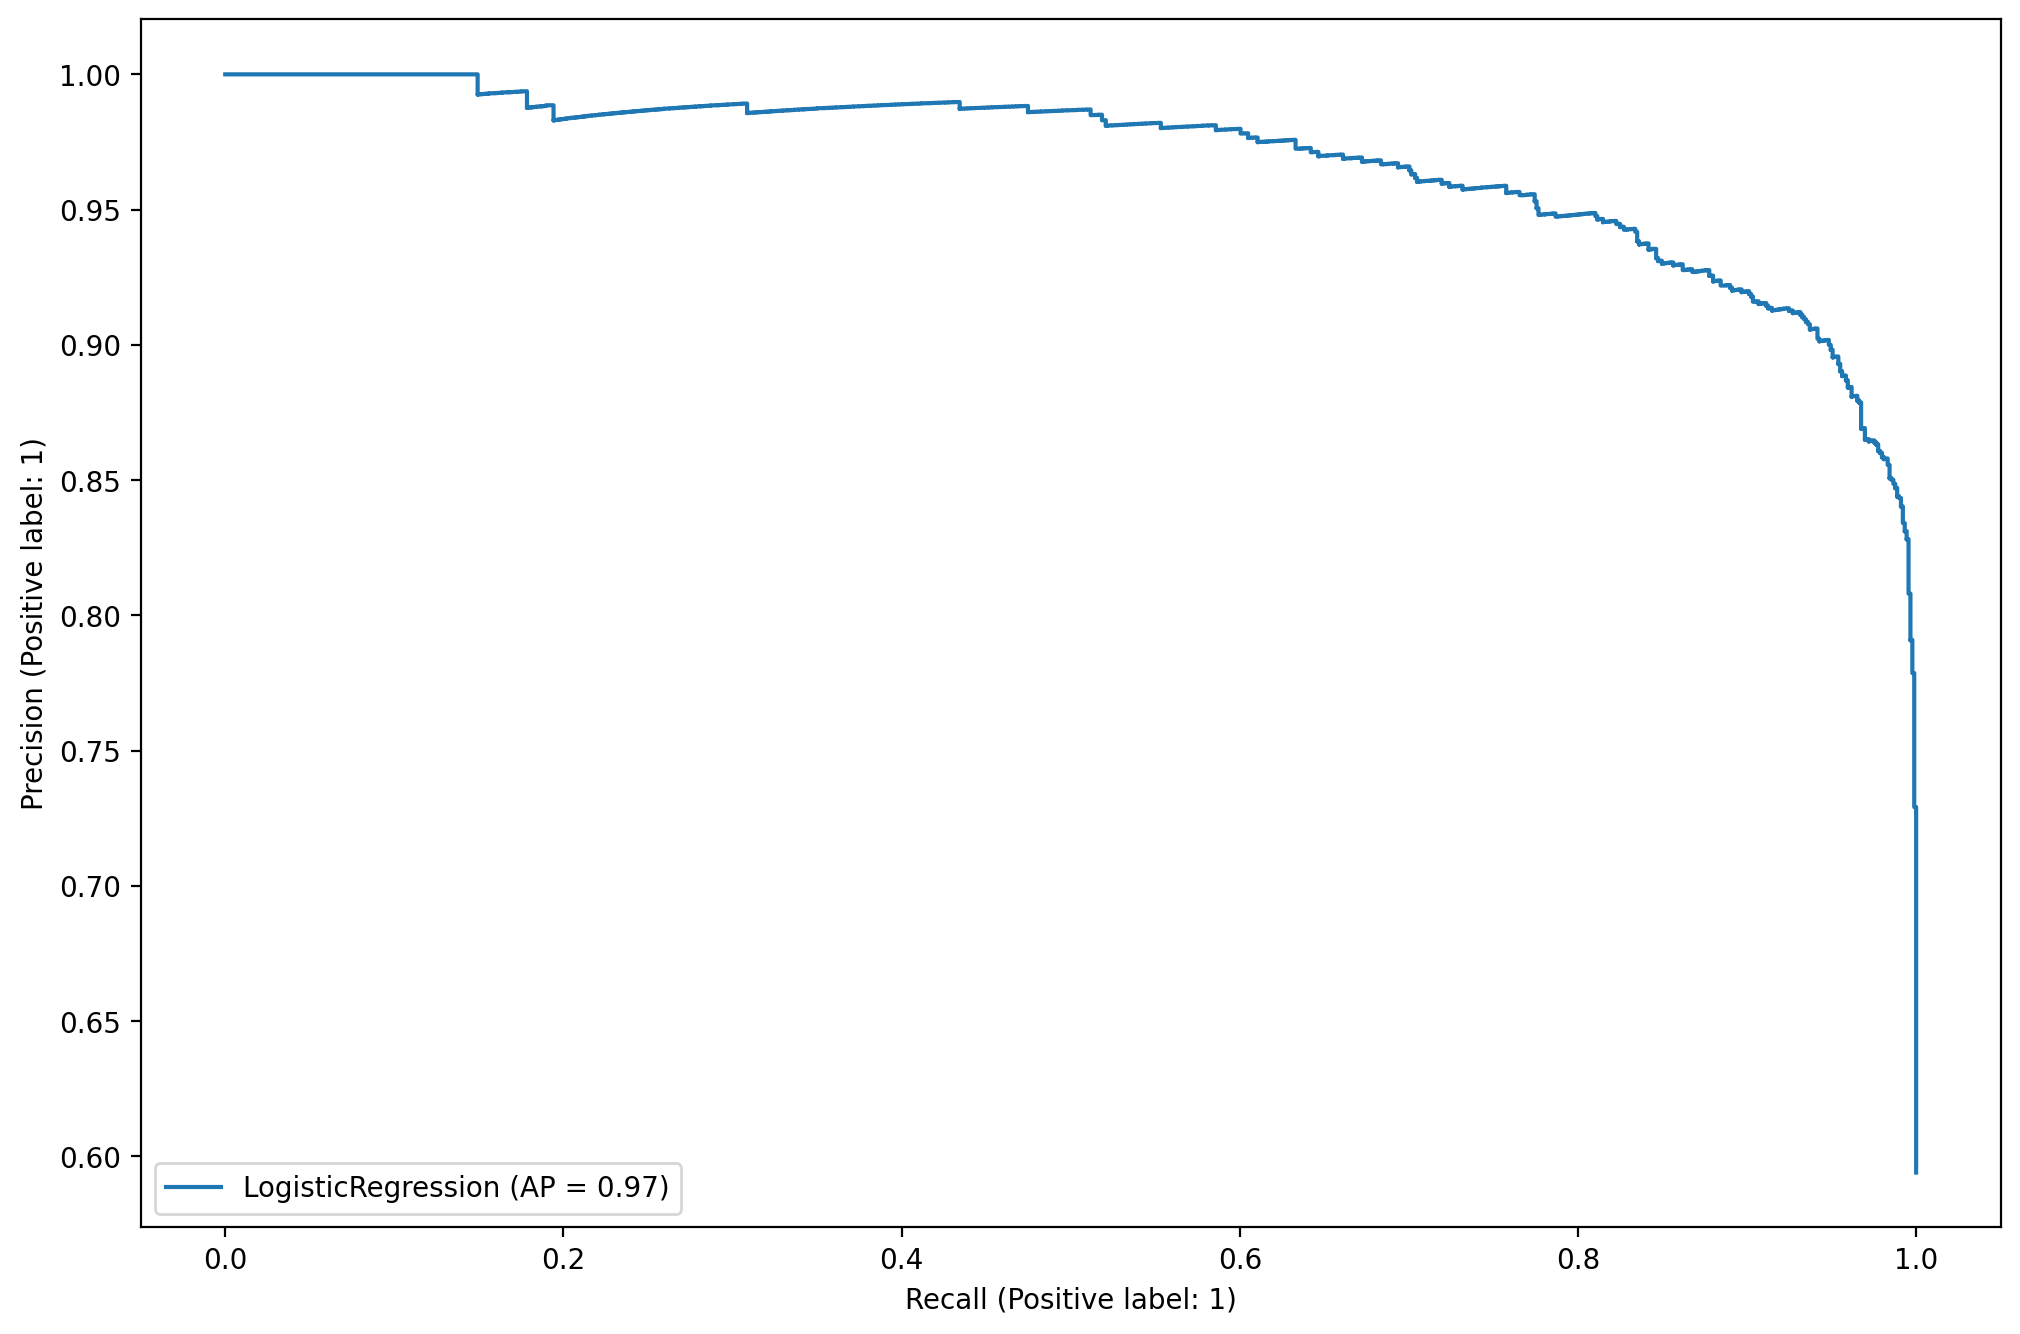

In [98]:
fig, ax= plt.subplots(figsize=(12,8),dpi=200)
plot_precision_recall_curve(logistic_model, X_test, y_test, ax= ax)